# FIFA-19 Data Analysis and Visualization

FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. Announced on 6 June 2018 for its E3 2018 press conference, it was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.It is the 26th installment in the FIFA series. As with FIFA 18, Cristiano Ronaldo initially as the cover athlete of the regular edition: however, following his unanticipated transfer from Spanish club Real Madrid to Italian side Juventus, new cover art was released, featuring Neymar, Kevin De Bruyne and Paulo Dybala.

The game features the UEFA club competitions for the first time, including the UEFA Champions League and UEFA Europa League.Martin Tyler and Alan Smith return as regular commentators, while the new commentary team of Derek Rae and Lee Dixon feature in the UEFA competitions mode.Composer Hans Zimmer and rapper Vince Staples recorded a new remix of the UEFA Champions League anthem specifically for the game. The character Alex Hunter, who first appeared in FIFA 17 returns for the third and final installment of "The Journey", entitled, "The Journey: Champions".In June 2019, a free update added the FIFA Women's World Cup as a separate game mode.

This is the last game in the FIFA series to be available on a seventh-generation console, and the last known game to be available for the PlayStation 3 worldwide.


# Importing Essentials

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19/data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Meeting the data

In [4]:
df=pd.read_csv('/kaggle/input/fifa19/data.csv')

In [5]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

We got a lot of cleanup to do

# Feature Engineering

## Dropping the not required columns

In [7]:
df.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo'], axis=1,inplace=True)

# Filling null values

In [8]:
df['International Reputation'].fillna(1,inplace=True)
df['Weak Foot'].fillna(1,inplace=True)
df['Skill Moves'].fillna(1,inplace=True)
df['Height'].fillna("5'9",inplace=True)
df['Weight'].fillna("198lbs",inplace=True)
df['Crossing'].fillna(df['Crossing'].mean(),inplace=True)
df['Finishing'].fillna(df['Finishing'].mean(),inplace=True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(),inplace=True)
df['ShortPassing'].fillna(df['ShortPassing'].mean(),inplace=True)
df['Volleys'].fillna(df['Volleys'].mean(),inplace=True)
df['Dribbling'].fillna(df['Dribbling'].mean(),inplace=True)
df['FKAccuracy'].fillna(df['FKAccuracy'].mean(),inplace=True)
df['LongPassing'].fillna(df['LongPassing'].mean(),inplace=True)
df['BallControl'].fillna(df['BallControl'].mean(),inplace=True)
df['Acceleration'].fillna(df['Acceleration'].mean(),inplace=True)
df['SprintSpeed'].fillna(df['SprintSpeed'].mean(),inplace=True)
df['Agility'].fillna(df['Agility'].mean(),inplace=True)
df['Balance'].fillna(df['Balance'].mean(),inplace=True)
df['Jumping'].fillna(df['Jumping'].mean(),inplace=True)
df['Stamina'].fillna(df['Stamina'].mean(),inplace=True)
df['Strength'].fillna(df['Strength'].mean(),inplace=True)
df['Position'].fillna('ST', inplace = True)
df['ShotPower'].fillna(df['ShotPower'].mean(),inplace=True)
df['Reactions'].fillna(df['Reactions'].mean(),inplace=True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['Wage'].fillna('€200K', inplace = True)
df['Work Rate'].fillna('Medium/Medium', inplace = True)
df['Marking'].fillna(df['Marking'].mean(), inplace = True)
df['StandingTackle'].fillna(df['StandingTackle'].mean(), inplace = True)
df['SlidingTackle'].fillna(df['SlidingTackle'].mean(), inplace = True)

In [9]:
df.fillna(0, inplace=True)

# Replacing '€' 

In [10]:
def extract(Value):
    col = Value.replace('€', '')
    if 'M' in col:
        col = float(col.replace('M', ''))*1000000
    elif 'K' in Value:
        col = float(col.replace('K', ''))*1000
    return float(col)

In [11]:
df['Value']=df['Value'].apply(extract)
df['Wage']=df['Wage'].apply(extract)

# Data visualization

# Analyzing Player Data

### What is the count of ages?

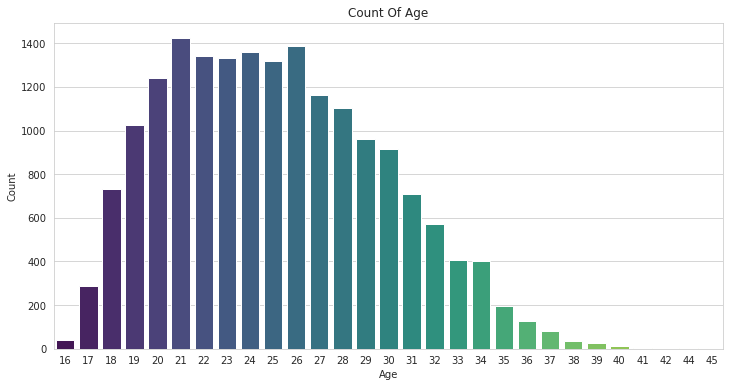

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(df['Age'],palette='viridis')
plt.title('Count Of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Maximum players are in their early 30's.

### What is the count of nationality?

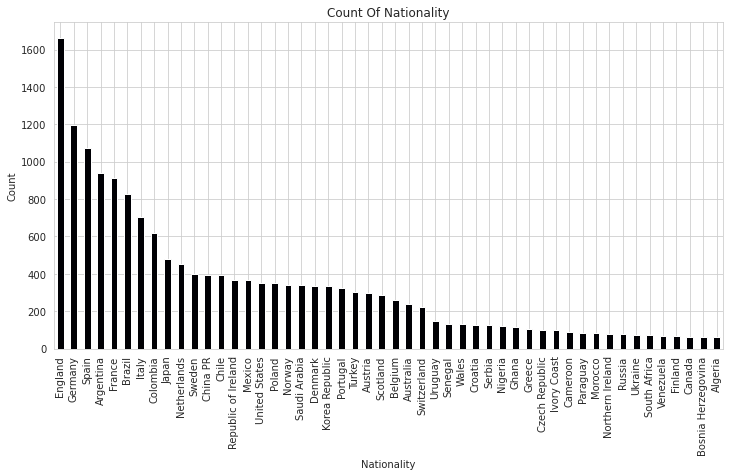

In [13]:
plt.figure(figsize=(12,6))
df['Nationality'].value_counts().head(50).plot.bar(cmap='inferno')
plt.title('Count Of Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Distribution of overall

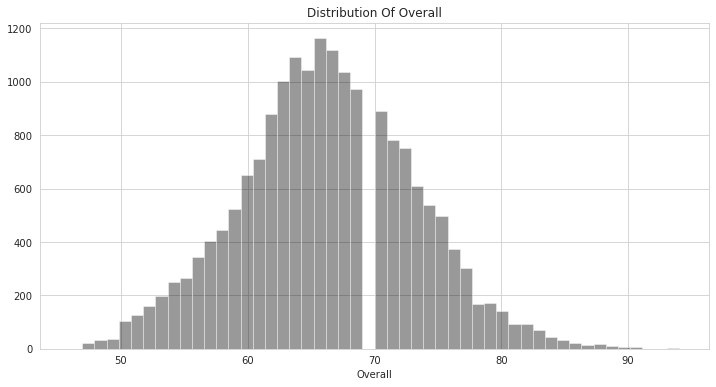

In [14]:
plt.figure(figsize=(12,6))
sns.distplot(df['Overall'],color='k',kde=False)
plt.title('Distribution Of Overall')
plt.xlabel('Overall')
plt.show()

### Distribution of Potential 

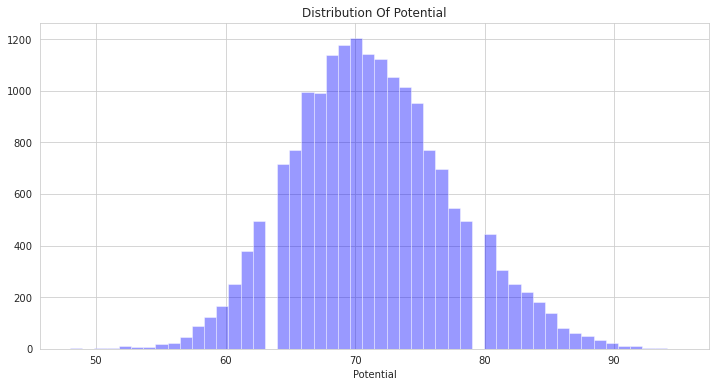

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(df['Potential'],kde=False,color='b')
plt.title('Distribution Of Potential')
plt.xlabel('Potential')
plt.show()

### What is the count of Skill Moves?

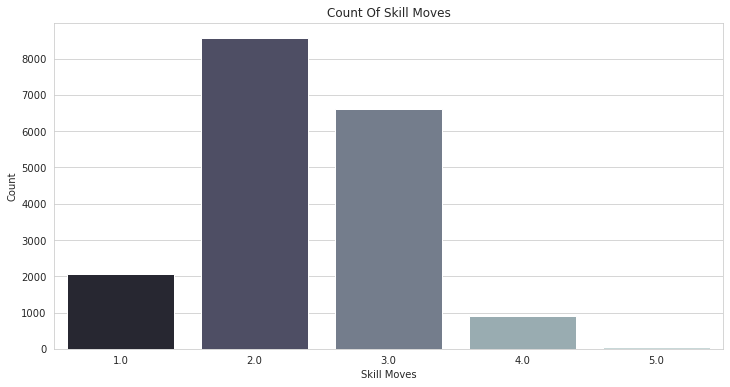

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(df['Skill Moves'],palette='bone')
plt.title('Count Of Skill Moves')
plt.xlabel('Skill Moves')
plt.ylabel('Count')
plt.show()

### What isthe count of Work Rate?

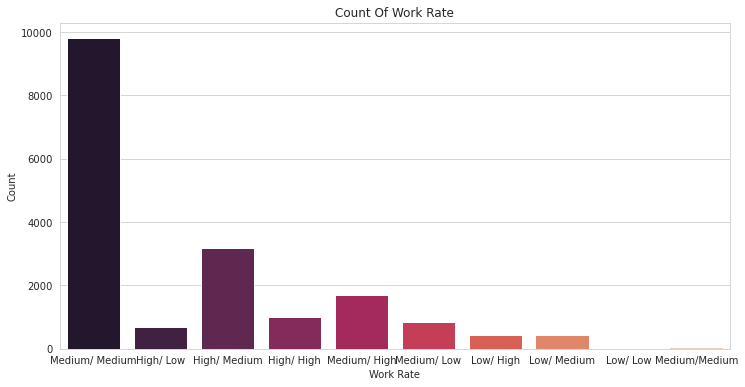

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(df['Work Rate'],palette='rocket')
plt.title('Count Of Work Rate')
plt.xlabel('Work Rate')
plt.ylabel('Count')
plt.show()

### What are the counts of various positions?

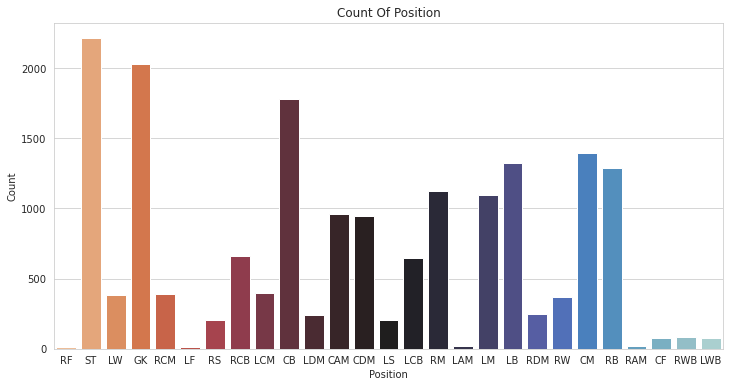

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(df['Position'],palette='icefire_r')
plt.title('Count Of Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

# Looking for relationships

### Let's pairplot

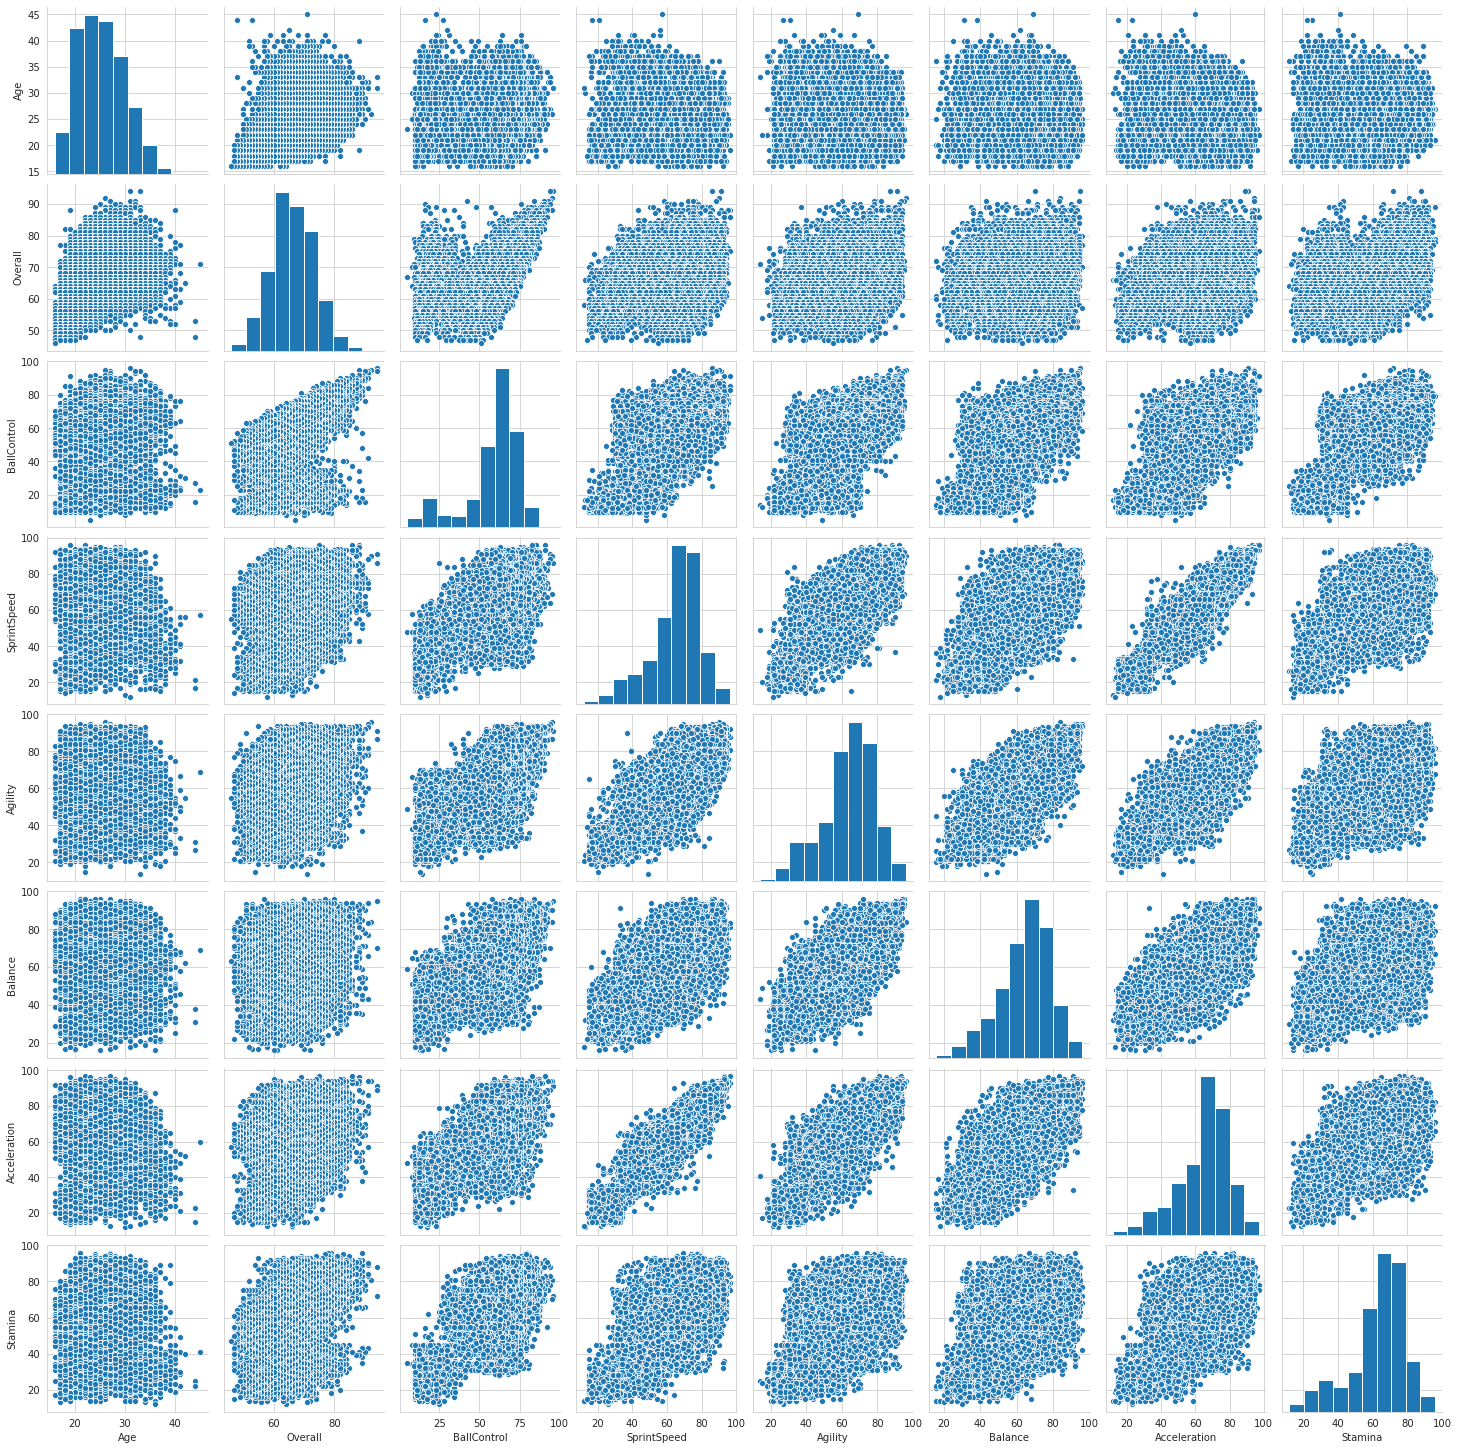

In [19]:
col=df[['Age','Overall','BallControl','SprintSpeed','Agility','Balance',
        'Acceleration','Stamina']]
sns.pairplot(col)

1. Acceleration and SprintSpeed forms a linear graph
2. Acceleration vs Agility, Balance vs Agility are pretty much correlated 

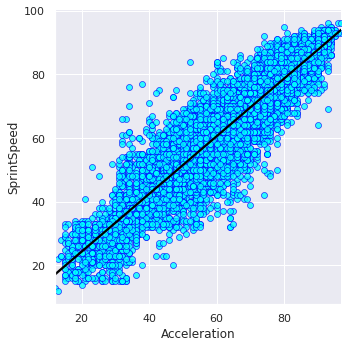

In [20]:
sns.set(palette='Dark2')
sns.lmplot(x='Acceleration',y='SprintSpeed',data=df,scatter_kws={'color':'cyan','edgecolor':'blue','linewidth':'0.7'},
           line_kws={'color':'black'})

Accelation is directly proportional to speed

## Ball Control vs Dribbling

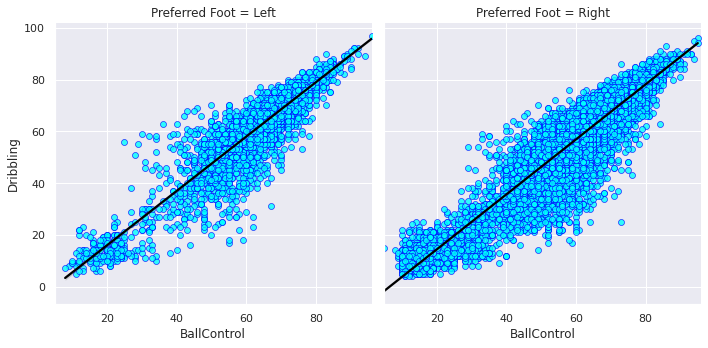

In [21]:
sns.lmplot(x='BallControl',y='Dribbling',data=df,col='Preferred Foot',
           scatter_kws={'color':'cyan','edgecolor':'blue','linewidth':'0.7'},
           line_kws={'color':'black'})

Looks like the right footed players have more control over the ball while dribbling

# Some more exploration

### International Reputation of the players 

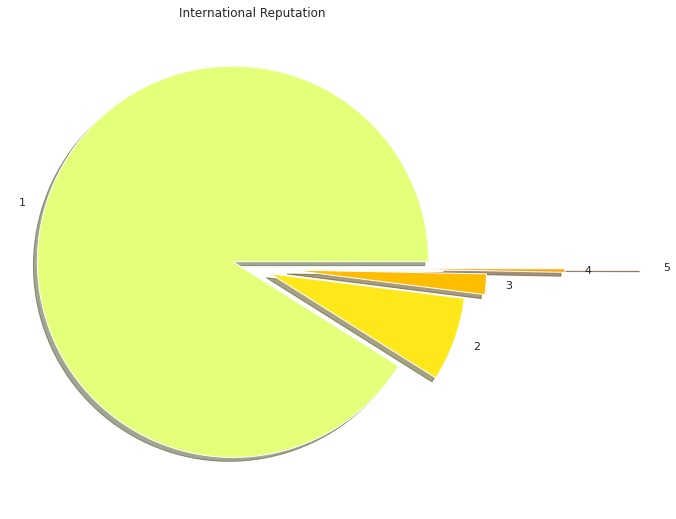

In [22]:
plt.figure(figsize=(9,9))
size=df['International Reputation'].value_counts()
label=['1','2','3','4','5']
colors=plt.cm.Wistia(np.linspace(0, 1, 5))
explode=[0.1,0.1,0.2,0.6,1]
plt.pie(size,labels=label,colors=colors,explode=explode,shadow=True)
plt.title('International Reputation')
plt.show()

### Weak Foot Rating

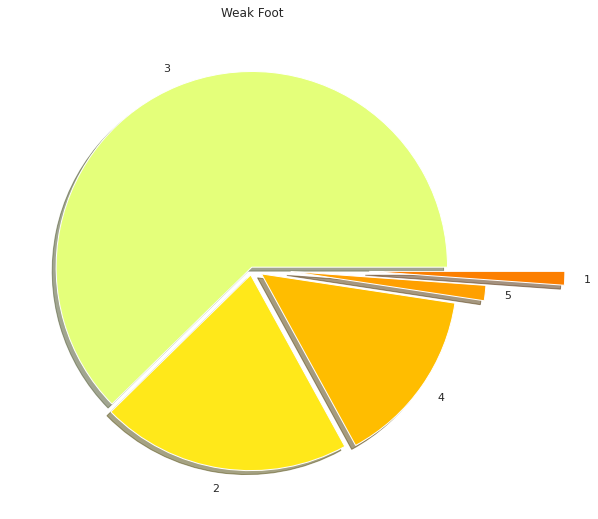

In [23]:
plt.figure(figsize=(9,9))
size=df['Weak Foot'].value_counts()
label=['3','2','4','5','1']
colors=plt.cm.Wistia(np.linspace(0, 1, 5))
explode=[0,0.04,0.06,0.2,0.6]
plt.pie(size,labels=label,colors=colors,explode=explode,shadow=True)
plt.title('Weak Foot')
plt.show()

### What is the preffreed foot of the players?

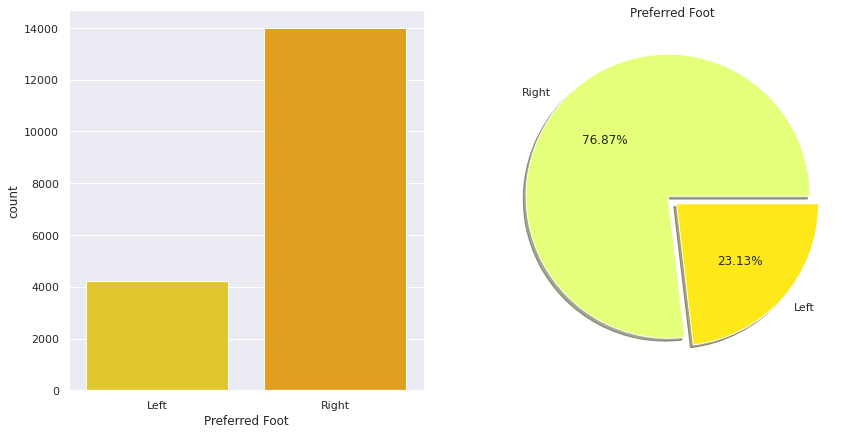

In [24]:
size=df['Preferred Foot'].value_counts()
label=['Right','Left']
colors=plt.cm.Wistia(np.linspace(0, 1, 5))
explode=[0.04,0.04]
fig,ax=plt.subplots(1,2,figsize=(14,7))
_=sns.countplot('Preferred Foot',data=df,ax=ax[0], palette='Wistia')
_=plt.pie(size,labels=label,colors=colors,explode=explode,shadow=True,autopct='%.2f%%')
plt.title('Preferred Foot')
plt.show()

Most of the players prefer right foot over left

### Count of heights

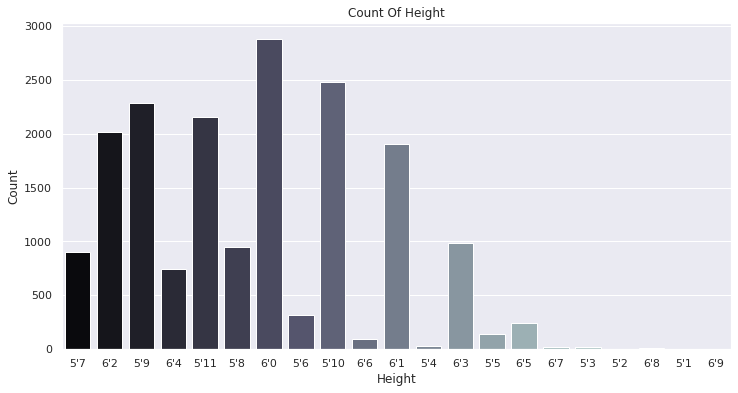

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(df['Height'],palette='bone')
plt.title('Count Of Height')
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

Looks like most of the players are 5'10 to 6'1 foot

### Count of weights

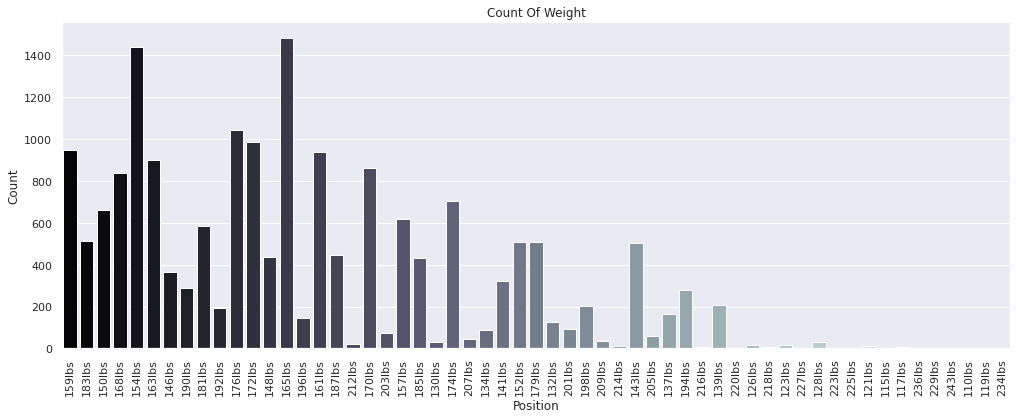

In [26]:
plt.figure(figsize=(17,6))
sns.countplot(df['Weight'],palette='bone')
plt.title('Count Of Weight')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Wage Distribution

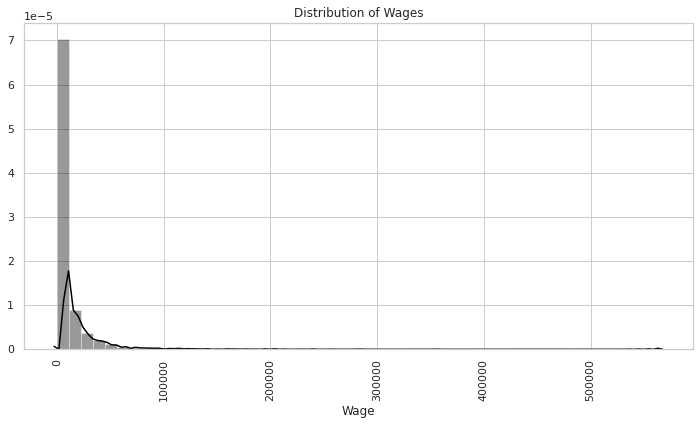

In [27]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.distplot(df['Wage'],color='black')
plt.title('Distribution of Wages')
plt.xticks(rotation=90)
plt.show()

# Grouping

In [28]:
def technical(df):
    return int(round((df[['Crossing','Dribbling','Finishing','HeadingAccuracy','LongShots','Marking',
                          'FKAccuracy','LongPassing','ShortPassing','StandingTackle',
                          'SlidingTackle','BallControl']].mean()).mean()))
def mental(df):
    return int(round((df[['Aggression','Composure','Positioning','Vision',
                          'Interceptions']].mean()).mean()))

def physical(df):
    return int(round((df[['Acceleration','Agility','Balance','Jumping','Stamina',
                          'Strength','Reactions','ShotPower']].mean()).mean()))

Here I have grouped the columns based on three skill factors:

* Technical Skills
* Mental Skills
* Physical

In [29]:
df['Technical']=df.apply(technical,axis=1)
df['Mental']=df.apply(mental,axis=1)
df['Physical']=df.apply(physical,axis=1)

# Player DataFrame

Let's define a new dataframe which consists of various attributes about a player

In [30]:
player_data=df[['Name','Age','Nationality','Overall','Club','Technical','Mental',
                'Physical','Position','Potential','Wage']]
player_data.head()

,Name,Age,Nationality,Overall,Club,Technical,Mental,Physical,Position,Potential,Wage
0,L. Messi,31,Argentina,94,FC Barcelona,74,71,82,RF,94,565000.0
1,Cristiano Ronaldo,33,Portugal,94,Juventus,72,73,87,ST,94,405000.0
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,70,72,80,LW,93,290000.0
3,De Gea,27,Spain,91,Manchester United,24,43,57,GK,93,260000.0
4,K. De Bruyne,27,Belgium,91,Manchester City,78,81,80,RCM,92,355000.0


In [31]:
df.drop(['Technical','Mental','Physical'],axis=1,inplace=True)

### Best Players from each positions with their age, nationality, club and attributes based on their Overall Scores

In [32]:
player_data.iloc[player_data.groupby(player_data['Overall'])['Potential'].idxmax()][['Position',
                                                                 'Name', 'Age', 'Club', 'Nationality',
                                                                                      'Technical','Mental','Physical']].head(10)

,Position,Name,Age,Club,Nationality,Technical,Mental,Physical
18206,CM,G. Nugent,16,Tranmere Rovers,England,42,45,55
18198,GK,J. Livesey,18,Burton Albion,England,13,21,33
18166,ST,N. Ayéva,16,Örebro SK,Sweden,35,36,60
18134,CM,F. Ranocchia,17,Perugia,Italy,45,48,55
18072,CM,D. Campbell,17,Aberdeen,Scotland,44,39,55
17901,CB,J. Dunn,17,Toronto FC,Canada,33,39,52
17784,CM,K. Askildsen,17,Stabæk Fotball,Norway,46,50,55
17644,LM,J. Campaz,18,Deportes Tolima,Colombia,42,39,57
17393,GK,A. Søndergaard,17,Wolverhampton Wanderers,Denmark,12,22,38
17175,CM,B. Mumba,16,Sunderland,England,48,51,58


### Best Players from each positions with their age, nationality, club based on their Position

In [33]:
player_data.iloc[player_data.groupby(player_data['Position'])['Potential'].idxmax()][['Position',
                                                                 'Name', 'Age', 'Club', 'Nationality',
                                                                                      'Technical','Mental','Physical']].head(10)

,Position,Name,Age,Club,Nationality,Technical,Mental,Physical
31,CAM,C. Eriksen,26,Tottenham Hotspur,Denmark,74,73,76
42,CB,S. Umtiti,24,FC Barcelona,France,75,73,78
27,CDM,Casemiro,26,Real Madrid,Brazil,77,81,78
350,CF,A. Milik,24,Napoli,Poland,63,63,72
78,CM,S. Milinković-Savić,23,Lazio,Serbia,79,79,77
3,GK,De Gea,27,Manchester United,Spain,24,43,57
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia,75,75,74
35,LB,Marcelo,30,Real Madrid,Brazil,80,84,84
77,LCB,M. Škriniar,23,Inter,Slovakia,62,68,67
11,LCM,T. Kroos,28,Real Madrid,Germany,81,78,70


## Top 10 highest paid players

In [34]:
player_data[player_data['Wage']>340000].sort_values(by='Wage',ascending=False).head(10)

,Name,Age,Nationality,Overall,Club,Technical,Mental,Physical,Position,Potential,Wage
0,L. Messi,31,Argentina,94,FC Barcelona,74,71,82,RF,94,565000.0
7,L. Suárez,31,Uruguay,91,FC Barcelona,74,78,84,RS,91,455000.0
6,L. Modrić,32,Croatia,91,Real Madrid,79,80,81,RCM,91,420000.0
1,Cristiano Ronaldo,33,Portugal,94,Juventus,72,73,87,ST,94,405000.0
8,Sergio Ramos,32,Spain,91,Real Madrid,77,77,80,RCB,91,380000.0
4,K. De Bruyne,27,Belgium,91,Manchester City,78,81,80,RCM,92,355000.0
11,T. Kroos,28,Germany,90,Real Madrid,81,78,70,LCM,90,355000.0
36,G. Bale,28,Wales,88,Real Madrid,78,75,82,ST,88,355000.0


 ## Top 10 Eldest players

In [35]:
player_data.sort_values('Age',ascending=False).head(10)

,Name,Age,Nationality,Overall,Club,Technical,Mental,Physical,Position,Potential,Wage
4741,O. Pérez,45,Mexico,71,Pachuca,19,30,61,GK,71,8000.0
18183,K. Pilkington,44,England,48,Cambridge United,13,23,32,GK,48,1000.0
17726,T. Warner,44,Trinidad & Tobago,53,Accrington Stanley,18,26,37,GK,53,1000.0
10545,S. Narazaki,42,Japan,65,Nagoya Grampus,25,33,56,GK,65,1000.0
7225,C. Muñoz,41,Argentina,68,CD Universidad de Concepción,22,37,50,GK,68,1000.0
1120,J. Villar,41,Paraguay,77,0,18,33,49,GK,77,0.0
12192,H. Sulaimani,41,Saudi Arabia,63,Ohod Club,64,71,63,LB,63,3000.0
15426,M. Tyler,41,England,59,Peterborough United,18,34,41,GK,59,1000.0
4228,B. Nivet,41,France,71,ESTAC Troyes,65,68,55,CAM,71,5000.0
10356,F. Kippe,40,Norway,65,Lillestrøm SK,51,58,50,LCB,65,1000.0


## Top 10 youngest players

In [36]:
player_data.sort_values('Age').head(10)

,Name,Age,Nationality,Overall,Club,Technical,Mental,Physical,Position,Potential,Wage
18206,G. Nugent,16,England,46,Tranmere Rovers,42,45,55,CM,66,1000.0
17743,J. Olstad,16,Norway,52,Sarpsborg 08 FF,37,38,60,ST,69,1000.0
13293,H. Massengo,16,France,62,AS Monaco,55,57,62,CDM,75,2000.0
16081,J. Italiano,16,Australia,58,Perth Glory,46,44,62,LM,79,1000.0
18166,N. Ayéva,16,Sweden,48,Örebro SK,35,36,60,ST,72,1000.0
17712,K. Broda,16,Poland,53,Wisła Kraków,12,19,31,GK,74,1000.0
17354,L. D'Arrigo,16,Australia,54,Adelaide United,41,46,56,CAM,71,1000.0
13567,Y. Verschaeren,16,Belgium,62,RSC Anderlecht,51,46,66,CAM,83,1000.0
16927,B. Nygren,16,Sweden,56,IFK Göteborg,39,39,60,ST,73,1000.0
18018,B. O'Gorman,16,Republic of Ireland,50,Bray Wanderers,38,40,51,RM,69,1000.0


## Finding correlation between selected columns

Here I have taken few attributes that characterize players

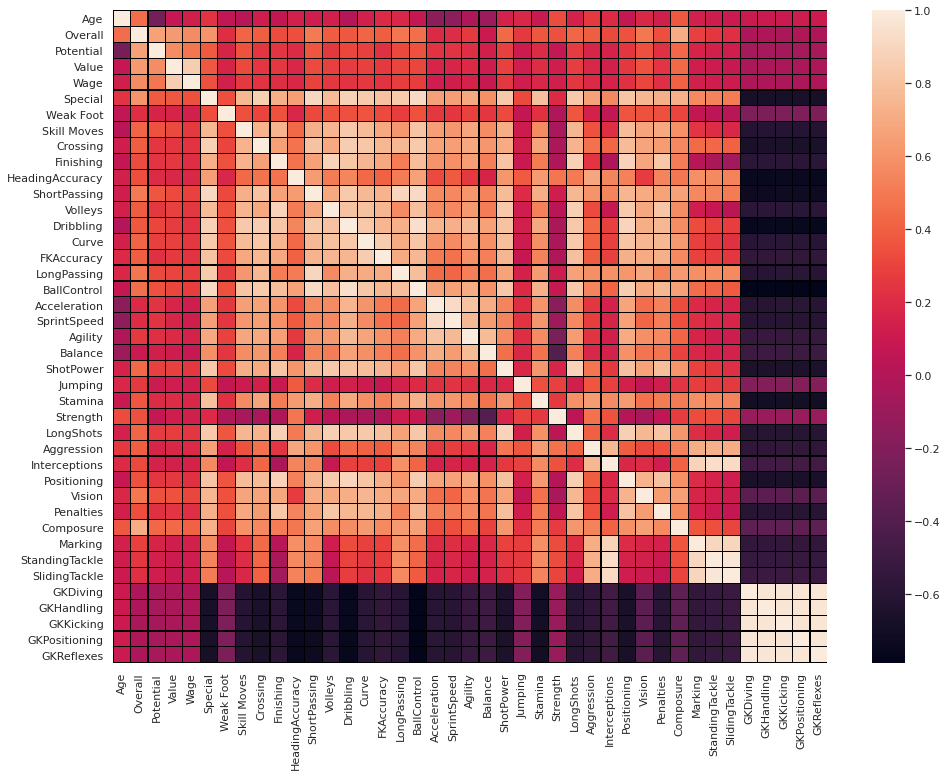

In [37]:
plt.figure(figsize=(16,12))
sns.heatmap(df[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value','Wage', 
                'Special', 'Preferred Foot', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type',
                'Height', 'Weight','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
                'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']].corr(),linecolor='black',linewidths=0.1)
plt.show()

# Analyzing Countries

## Top 10 countries with most players

In [38]:
df['Nationality'].value_counts().head(10)

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

In [39]:
nation=('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia','Japan','Netherlands')
df_nation=df.loc[df['Nationality'].isin(nation) & df['Overall']]

## Overall Score of the top 10 countries

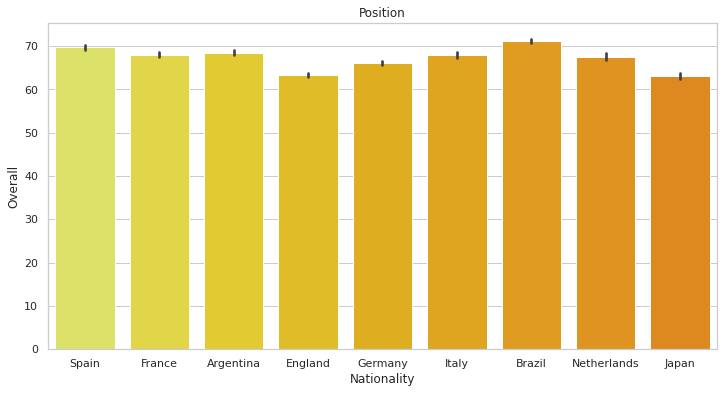

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x=df_nation['Nationality'],y=df_nation['Overall'], palette='Wistia')
plt.title('Position')
plt.show()

## Potential Score of the top 10 countries

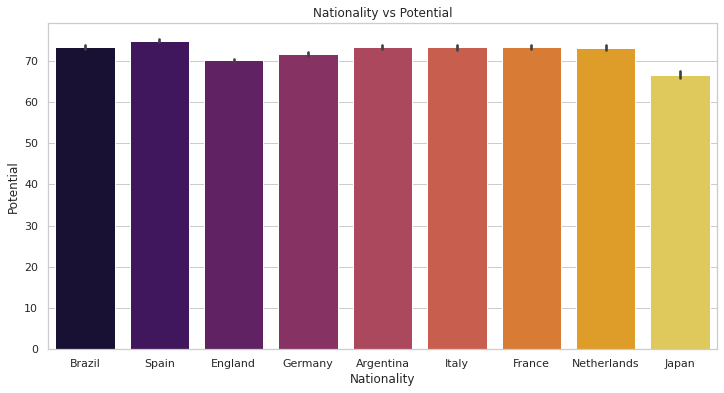

In [41]:
nation=('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia','Japan','Netherlands')
df_nation=df.loc[df['Nationality'].isin(nation) & df['Potential']]

plt.figure(figsize=(12,6))
sns.barplot(x=df_nation['Nationality'],y=df_nation['Potential'], palette='inferno')
plt.title('Nationality vs Potential')
plt.xlabel('Nationality')
plt.ylabel('Potential')
plt.show()

## Age differences between the top 10 countries

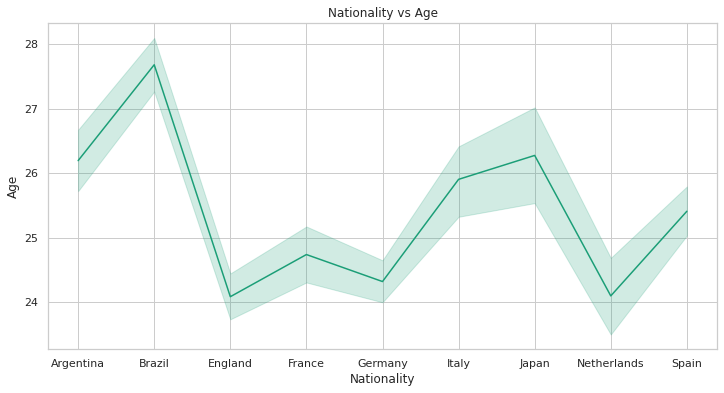

In [42]:
nation=('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia','Japan','Netherlands')
df_nation=df.loc[df['Nationality'].isin(nation) & df['Overall']]

plt.figure(figsize=(12,6))
sns.lineplot(x=df_nation['Nationality'],y=df_nation['Age'])
plt.title('Nationality vs Age')
plt.xlabel('Nationality')
plt.ylabel('Age')
plt.show()

# Analyzing countries by skill set

## Nationality vs Technical Skills

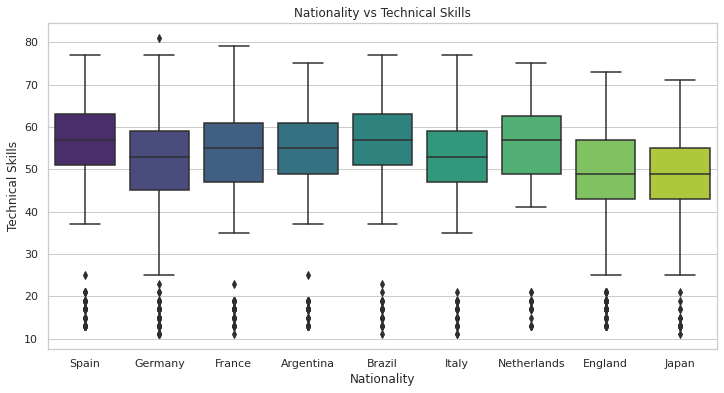

In [43]:
nation=('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia','Japan','Netherlands')
player_data_nation=player_data.loc[df['Nationality'].isin(nation) & player_data['Technical']]

plt.figure(figsize=(12,6))
sns.boxplot(x=player_data_nation['Nationality'],y=player_data_nation['Technical'], palette='viridis')
plt.title('Nationality vs Technical Skills')
plt.xlabel('Nationality')
plt.ylabel('Technical Skills')
plt.show()

## Nationality vs Mental Skills

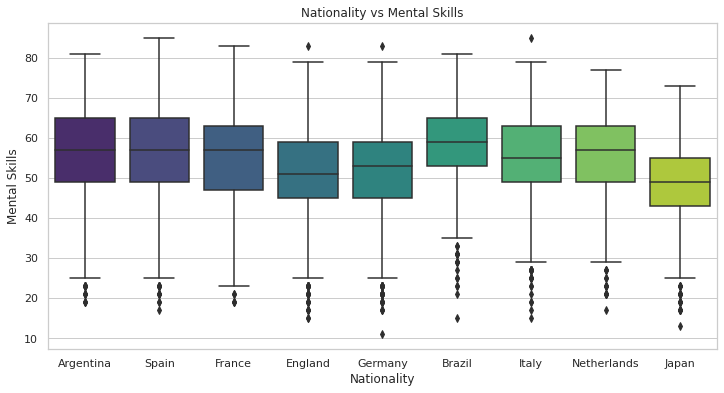

In [44]:
nation=('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia','Japan','Netherlands')
player_data_nation=player_data.loc[df['Nationality'].isin(nation) & player_data['Mental']]

plt.figure(figsize=(12,6))
sns.boxplot(x=player_data_nation['Nationality'],y=player_data_nation['Mental'], palette='viridis')
plt.title('Nationality vs Mental Skills')
plt.xlabel('Nationality')
plt.ylabel('Mental Skills')
plt.show()

## Nationality vs Physical Skills

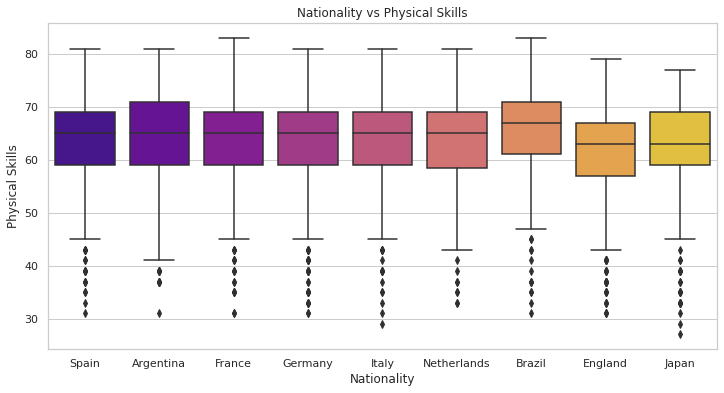

In [45]:
nation=('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia','Japan','Netherlands')
player_data_nation=player_data.loc[df['Nationality'].isin(nation) & player_data['Physical']]

plt.figure(figsize=(12,6))
sns.boxplot(x=player_data_nation['Nationality'],y=player_data_nation['Physical'], palette='plasma')
plt.title('Nationality vs Physical Skills')
plt.xlabel('Nationality')
plt.ylabel('Physical Skills')
plt.show()

# Visualizing Indian players by Age

In [46]:
player_data[player_data['Nationality']=='India'][['Name','Age','Overall',
                                                  'Technical','Mental',
                                                  'Physical','Position']].sort_values(by='Age',ascending=False)

,Name,Age,Overall,Technical,Mental,Physical,Position
8605,S. Chhetri,33,67,54,52,67,LS
13508,A. Edathodika,31,62,44,45,58,LCB
16793,E. Lyngdoh,31,56,51,47,66,ST
16450,S. Paul,31,57,16,28,47,ST
15884,B. Singh,31,58,39,38,63,ST
16499,A. Mondal,28,57,39,43,59,CB
15356,R. Singh,28,59,42,39,63,ST
12598,J. Lalpekhlua,27,63,52,46,67,RS
12811,G. Singh Sandhu,26,63,18,32,44,GK
17129,J. Singh,26,55,41,35,68,ST


# Visualizing Club Data

## Top 10 Clubs with the higheat numbers of Players

In [47]:
df['Club'].value_counts().head(10)

0                      241
Eintracht Frankfurt     33
Fortuna Düsseldorf      33
Newcastle United        33
FC Barcelona            33
CD Leganés              33
Burnley                 33
TSG 1899 Hoffenheim     33
Arsenal                 33
Chelsea                 33
Name: Club, dtype: int64

## What is their Overall distribution?

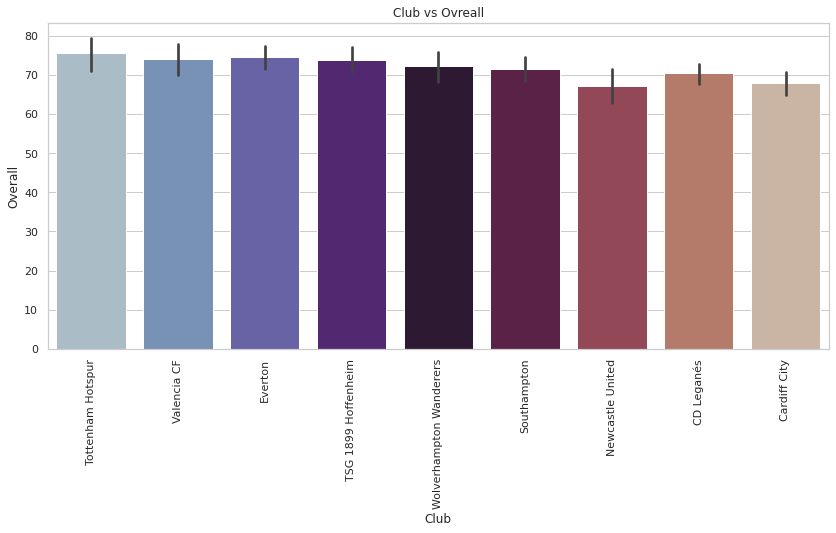

In [48]:
clubs=('CD Leganés','Newcastle United','Cardiff City','Everton','TSG 1899 Hoffenheim','Southampton',
      'Tottenham Hotspur','Valencia CF','Wolverhampton Wanderers')
df_club=df.loc[df['Club'].isin(clubs) & df['Overall']]

plt.figure(figsize=(14,6))
sns.barplot(x=df_club['Club'],y=df_club['Overall'],palette='twilight')
plt.xticks(rotation=90)
plt.title('Club vs Ovreall')
plt.xlabel('Club')
plt.ylabel('Overall')
plt.show()

## Distribution by Age

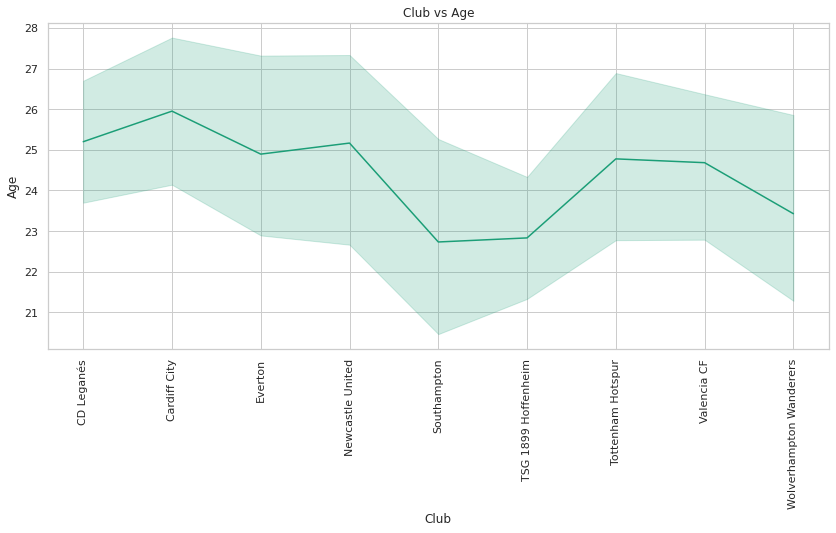

In [49]:
clubs=('CD Leganés','Newcastle United','Cardiff City','Everton','TSG 1899 Hoffenheim','Southampton',
      'Tottenham Hotspur','Valencia CF','Wolverhampton Wanderers')
df_club=player_data.loc[player_data['Club'].isin(clubs) & player_data['Age']]

plt.figure(figsize=(14,6))
sns.lineplot(x=df_club['Club'],y=df_club['Age'],palette='plasma')
plt.xticks(rotation=90)
plt.title('Club vs Age')
plt.xlabel('Club')
plt.ylabel('Age')
plt.show()

## Distribution by Potential Scores

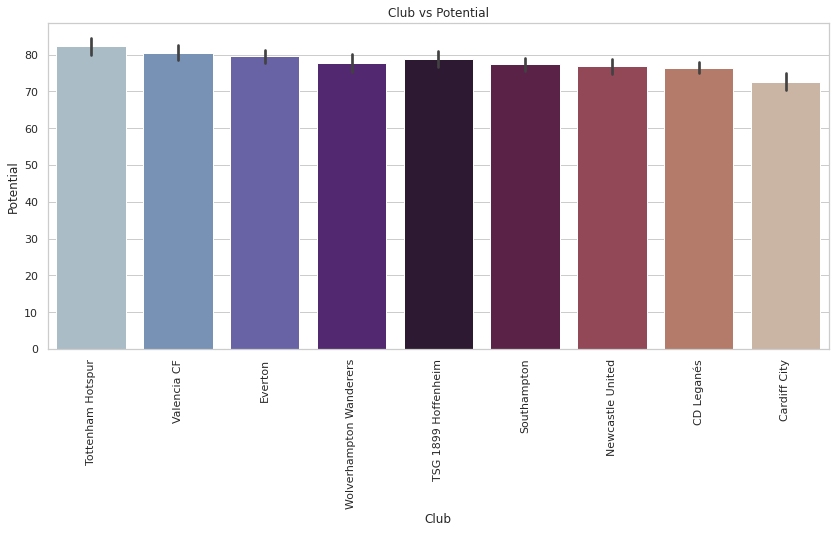

In [50]:
clubs=('CD Leganés','Newcastle United','Cardiff City','Everton','TSG 1899 Hoffenheim','Southampton',
      'Tottenham Hotspur','Valencia CF','Wolverhampton Wanderers')
df_club=df.loc[df['Club'].isin(clubs) & df['Potential']]

plt.figure(figsize=(14,6))
sns.barplot(x=df_club['Club'],y=df_club['Potential'],palette='twilight')
plt.xticks(rotation=90)
plt.title('Club vs Potential')
plt.xlabel('Club')
plt.ylabel('Potential')
plt.show()

# Distribution by Skill Set

## CLub vs Technical SKill

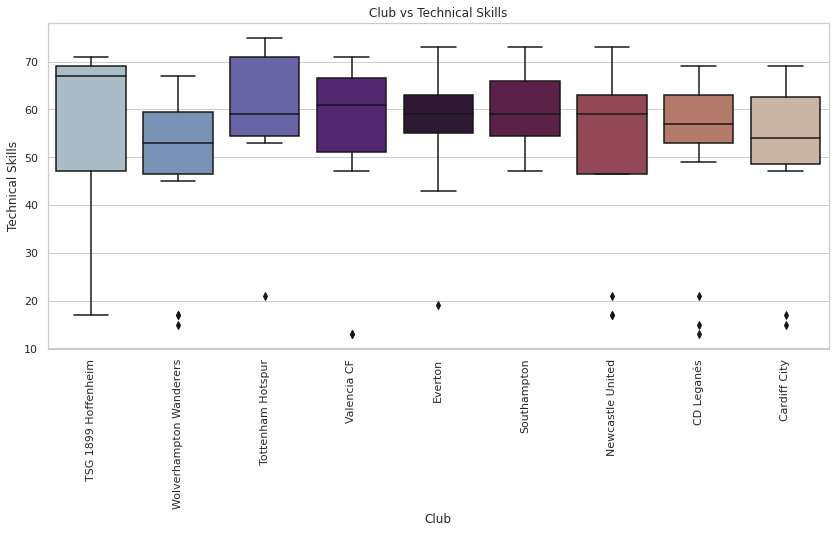

In [51]:
clubs=('CD Leganés','Newcastle United','Cardiff City','Everton','TSG 1899 Hoffenheim','Southampton',
      'Tottenham Hotspur','Valencia CF','Wolverhampton Wanderers')
df_club=player_data.loc[player_data['Club'].isin(clubs) & player_data['Technical']]

plt.figure(figsize=(14,6))
sns.boxplot(x=df_club['Club'],y=df_club['Technical'],palette='twilight')
plt.xticks(rotation=90)
plt.title('Club vs Technical Skills')
plt.xlabel('Club')
plt.ylabel('Technical Skills')
plt.show()

## CLub vs Mental SKill

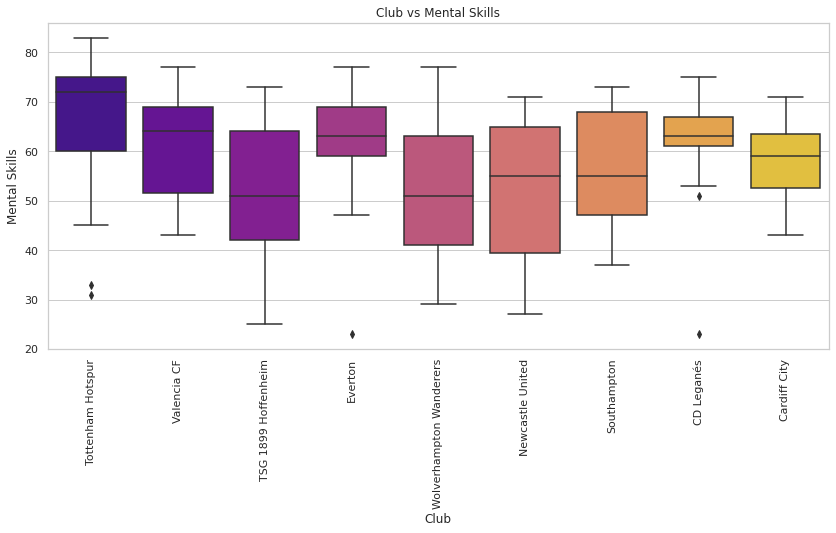

In [52]:
clubs=('CD Leganés','Newcastle United','Cardiff City','Everton','TSG 1899 Hoffenheim','Southampton',
      'Tottenham Hotspur','Valencia CF','Wolverhampton Wanderers')
df_club=player_data.loc[player_data['Club'].isin(clubs) & player_data['Mental']]

plt.figure(figsize=(14,6))
sns.boxplot(x=df_club['Club'],y=df_club['Mental'],palette='plasma')
plt.xticks(rotation=90)
plt.title('Club vs Mental Skills')
plt.xlabel('Club')
plt.ylabel('Mental Skills')
plt.show()

## CLub vs Physical SKill

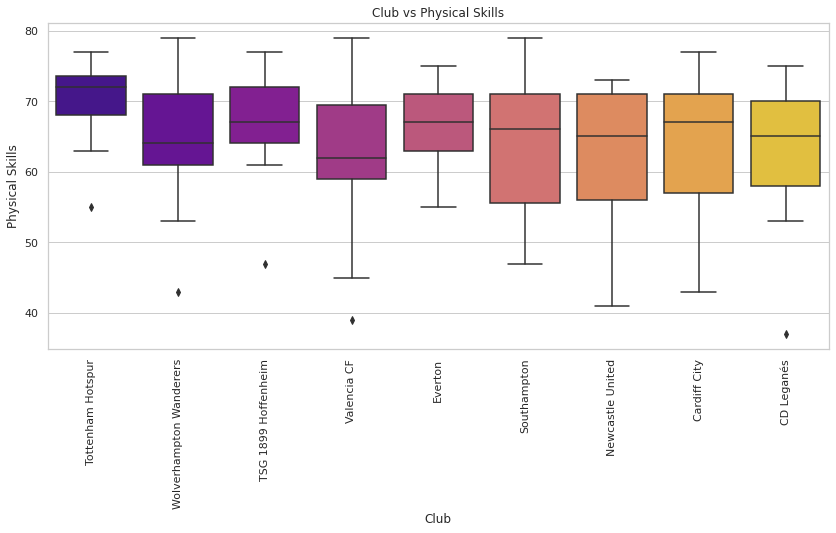

In [53]:
clubs=('CD Leganés','Newcastle United','Cardiff City','Everton','TSG 1899 Hoffenheim','Southampton',
      'Tottenham Hotspur','Valencia CF','Wolverhampton Wanderers')
df_club=player_data.loc[player_data['Club'].isin(clubs) & player_data['Physical']]

plt.figure(figsize=(14,6))
sns.boxplot(x=df_club['Club'],y=df_club['Physical'],palette='plasma')
plt.xticks(rotation=90)
plt.title('Club vs Physical Skills')
plt.xlabel('Club')
plt.ylabel('Physical Skills')
plt.show()

## Wage distribution of the top 10 clubs

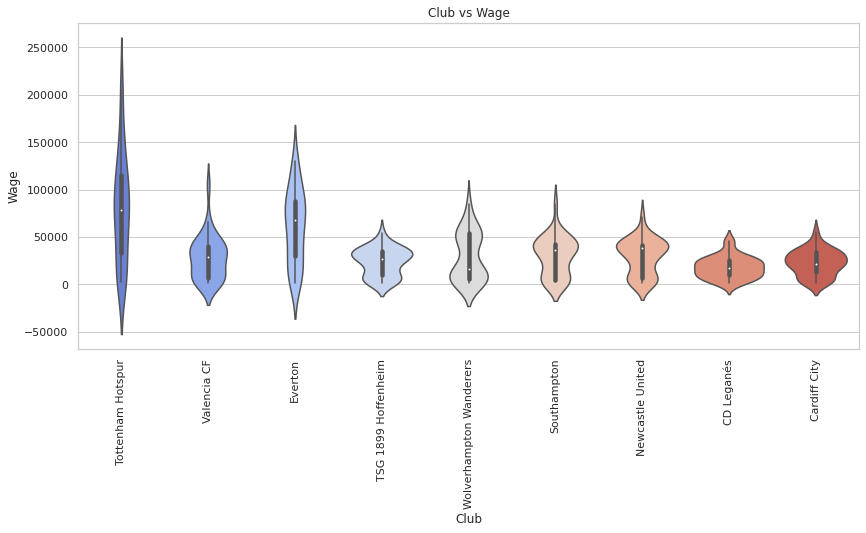

In [54]:
clubs=('CD Leganés','Newcastle United','Cardiff City','Everton','TSG 1899 Hoffenheim','Southampton',
      'Tottenham Hotspur','Valencia CF','Wolverhampton Wanderers')
df_club=player_data.loc[player_data['Club'].isin(clubs) & player_data['Wage']]

plt.figure(figsize=(14,6))
sns.violinplot(x=df_club['Club'],y=df_club['Wage'],palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Club vs Wage')
plt.xlabel('Club')
plt.ylabel('Wage')
plt.show()

# Defining features of players

In [55]:
player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Spider Plot

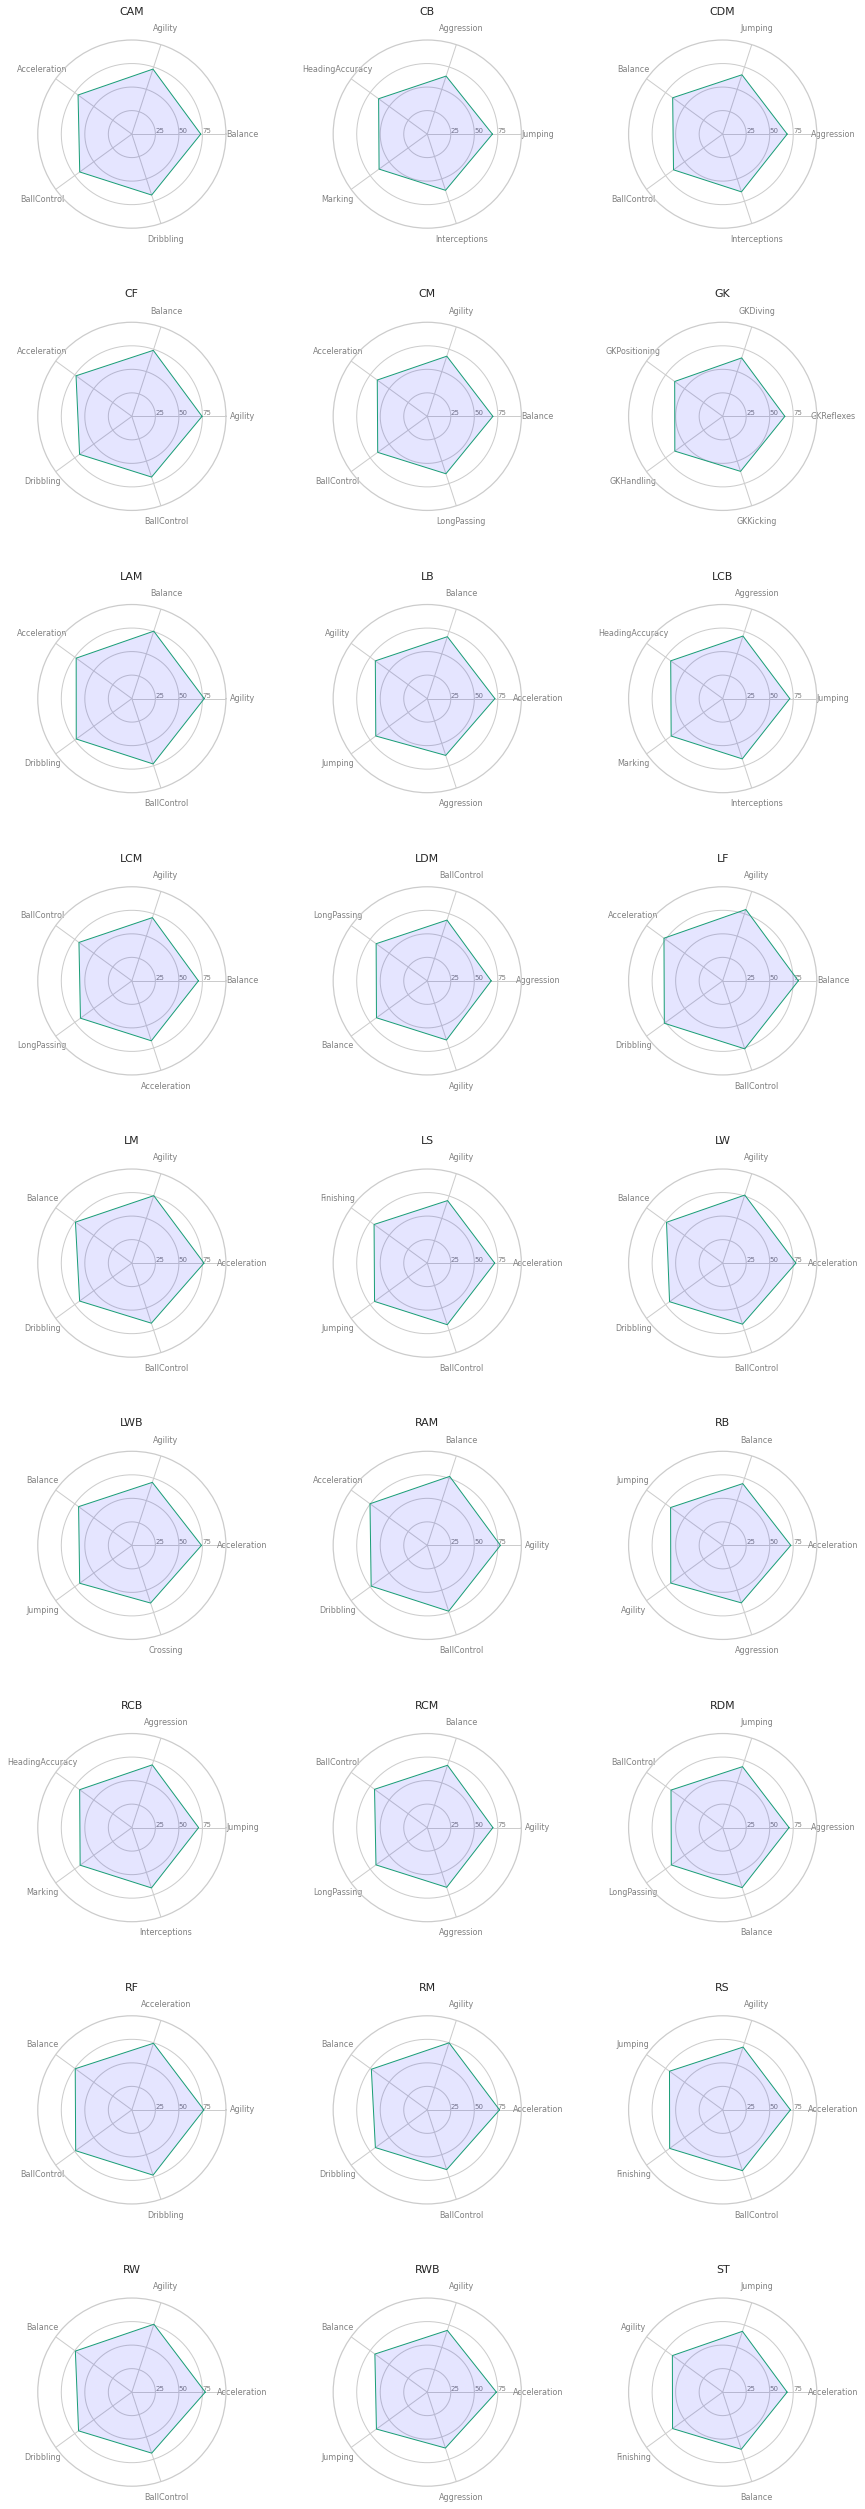

In [56]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

# This is one of my most detailed work

### Please do upvote if you like it and do comment if and suggestion/Improvements